## Imports Libs

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, ReLU
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


2024-12-03 14:03:42.284388: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 14:03:42.296420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733245422.309434    9989 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733245422.313033    9989 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 14:03:42.326393: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Prepare data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Set Models

### 2.a Perceptron with Logistic Activation, SSE Cost, Gradient Descent

In [5]:
model_2a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])
model_2a.compile(optimizer=SGD(), loss=MeanSquaredError(), metrics=['accuracy'])

/home/nikomania/Documents/Github/NOIA-Trabalho-1/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-12-03 14:03:44.466867: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### 2.b Softmax Output and Cross-Entropy Loss

In [6]:
model_2b = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2b.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2.c Adam Optimizer

In [7]:
model_2c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2c.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2.d ReLU Activation

In [8]:
model_2d = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_2d.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2e) Larger Networks

##### Single Hidden Layer with 256 Neurons

In [9]:
model_2e_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model_2e_1.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

##### Two Hidden Layers with 256 Neurons

In [10]:
model_2e_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_2e_2.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [31]:
def plot_history(history, model_id):
    plt.title(f'Model {model_id}')
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.title(f'Model {model_id}')
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Training

In [11]:
history_2a = model_2a.fit(x_train, to_categorical(y_train), validation_data=(x_test, to_categorical(y_test)), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0957 - loss: 0.1568 - val_accuracy: 0.2258 - val_loss: 0.0910
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2342 - loss: 0.0903 - val_accuracy: 0.2892 - val_loss: 0.0887
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2764 - loss: 0.0886 - val_accuracy: 0.3104 - val_loss: 0.0880
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2947 - loss: 0.0880 - val_accuracy: 0.3283 - val_loss: 0.0874
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3161 - loss: 0.0874 - val_accuracy: 0.3525 - val_loss: 0.0868
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3435 - loss: 0.0868 - val_accuracy: 0.3817 - val_loss: 0.0862
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3668 - loss: 0.0863 - val_accuracy: 0.4056 - val_loss: 0.0856
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3922 - loss: 0.0856 - val_accuracy: 0.

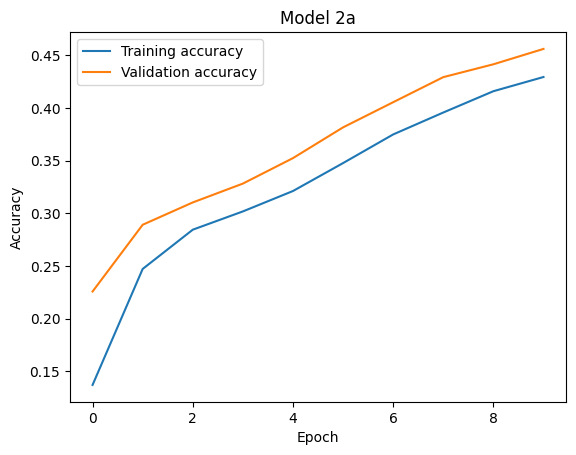

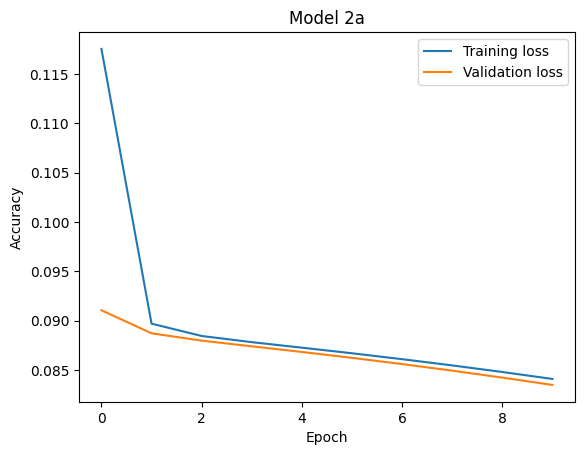

In [32]:
plot_history(history_2a, '2a')

In [13]:
history_2b = model_2b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4692 - loss: 2.0347 - val_accuracy: 0.7722 - val_loss: 1.3121
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7911 - loss: 1.1883 - val_accuracy: 0.8390 - val_loss: 0.8552
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8378 - loss: 0.8197 - val_accuracy: 0.8609 - val_loss: 0.6599
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8557 - loss: 0.6522 - val_accuracy: 0.8749 - val_loss: 0.5570
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8672 - loss: 0.5666 - val_accuracy: 0.8839 - val_loss: 0.4961
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8766 - loss: 0.5037 - val_accuracy: 0.8899 - val_loss: 0.4542
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8802 - loss: 0.4678 - val_accuracy: 0.8928 - val_loss: 0.4251
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8844 - loss: 0.4434 - val_accuracy: 0.

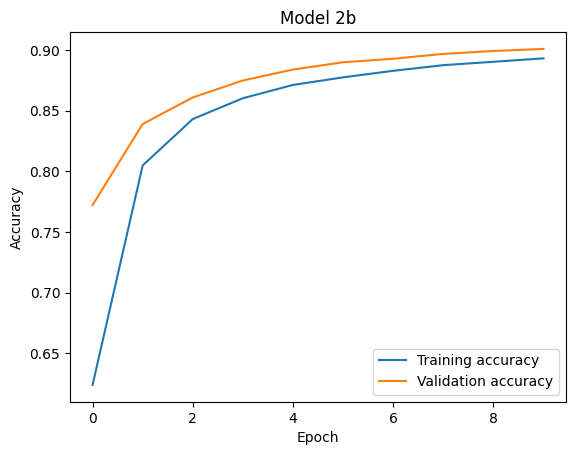

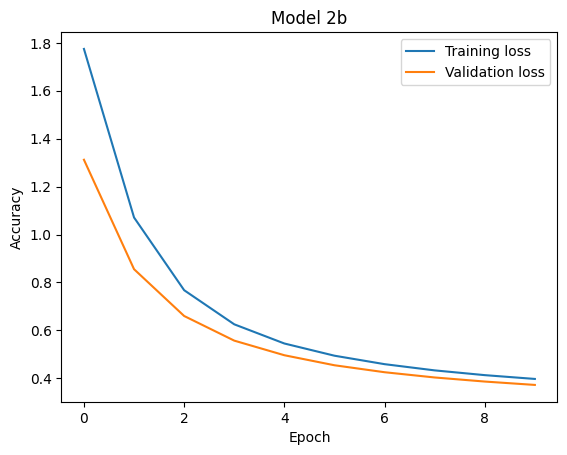

In [33]:
plot_history(history_2b, '2b')

In [14]:
history_2c = model_2c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8075 - loss: 0.7946 - val_accuracy: 0.9241 - val_loss: 0.2653
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9289 - loss: 0.2489 - val_accuracy: 0.9422 - val_loss: 0.1992
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9472 - loss: 0.1867 - val_accuracy: 0.9508 - val_loss: 0.1624
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9581 - loss: 0.1482 - val_accuracy: 0.9584 - val_loss: 0.1371
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9656 - loss: 0.1227 - val_accuracy: 0.9639 - val_loss: 0.1206
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9702 - loss: 0.1057 - val_accuracy: 0.9667 - val_loss: 0.1101
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9757 - loss: 0.0889 - val_accuracy: 0.9692 - val_loss: 0.1001
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9799 - loss: 0.0749 - val_accuracy: 0.

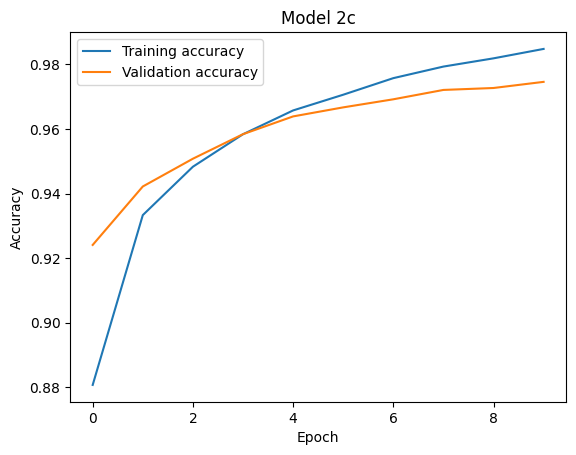

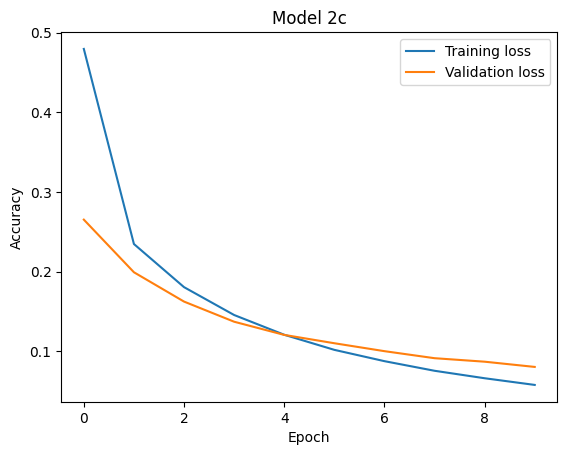

In [34]:
plot_history(history_2c, '2c')

In [15]:
history_2d = model_2d.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8543 - loss: 0.5141 - val_accuracy: 0.9521 - val_loss: 0.1634
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9563 - loss: 0.1512 - val_accuracy: 0.9664 - val_loss: 0.1124
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9707 - loss: 0.0995 - val_accuracy: 0.9735 - val_loss: 0.0876
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9800 - loss: 0.0700 - val_accuracy: 0.9747 - val_loss: 0.0840
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9826 - loss: 0.0590 - val_accuracy: 0.9784 - val_loss: 0.0746
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9862 - loss: 0.0460 - val_accuracy: 0.9755 - val_loss: 0.0784
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9902 - loss: 0.0349 - val_accuracy: 0.9756 - val_loss: 0.0804
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9899 - loss: 0.0313 - val_accuracy: 0.

In [ ]:
plot_history(history_2d, '2d')

In [16]:
history_2e_1 = model_2e_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8742 - loss: 0.4423 - val_accuracy: 0.9606 - val_loss: 0.1329
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9665 - loss: 0.1158 - val_accuracy: 0.9725 - val_loss: 0.0928
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9788 - loss: 0.0707 - val_accuracy: 0.9770 - val_loss: 0.0750
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9856 - loss: 0.0497 - val_accuracy: 0.9752 - val_loss: 0.0785
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9888 - loss: 0.0395 - val_accuracy: 0.9800 - val_loss: 0.0655
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9924 - loss: 0.0263 - val_accuracy: 0.9772 - val_loss: 0.0752
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9934 - loss: 0.0226 - val_accuracy: 0.9801 - val_loss: 0.0665
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9958 - loss: 0.0155 - val_accuracy: 0.

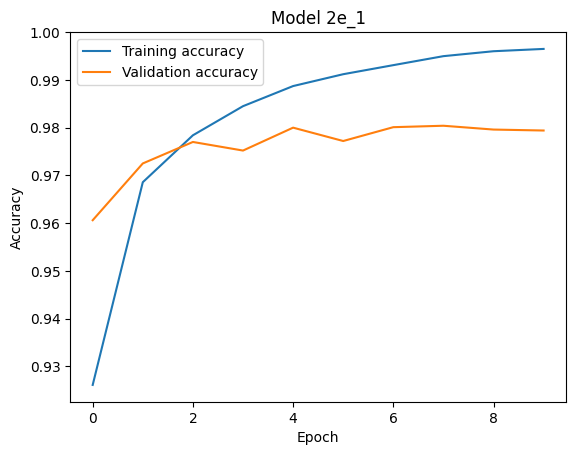

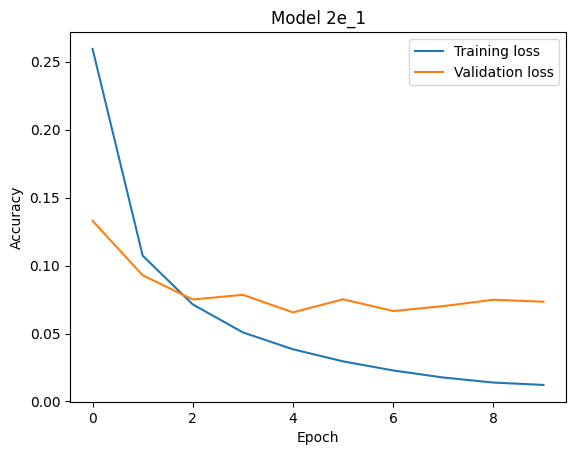

In [35]:
plot_history(history_2e_1, '2e_1')

In [17]:
history_2e_2 = model_2e_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8602 - loss: 0.4928 - val_accuracy: 0.9544 - val_loss: 0.1460
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9654 - loss: 0.1173 - val_accuracy: 0.9633 - val_loss: 0.1197
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9752 - loss: 0.0810 - val_accuracy: 0.9713 - val_loss: 0.0881
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9817 - loss: 0.0581 - val_accuracy: 0.9742 - val_loss: 0.0811
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9852 - loss: 0.0465 - val_accuracy: 0.9725 - val_loss: 0.0857
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9891 - loss: 0.0356 - val_accuracy: 0.9751 - val_loss: 0.0810
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9775 - val_loss: 0.0775
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.

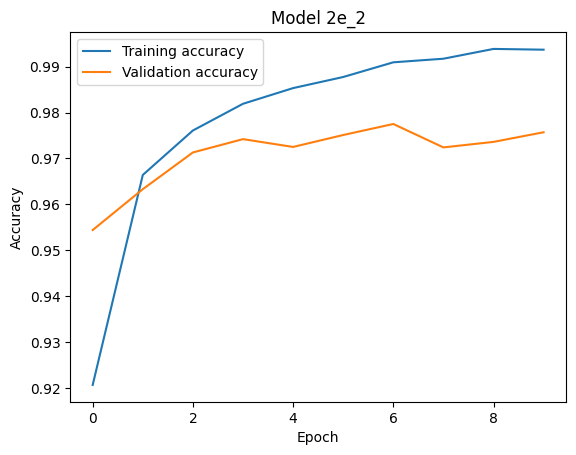

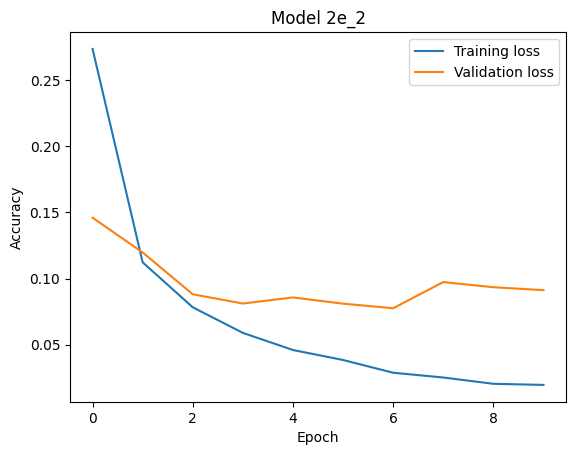

In [36]:
plot_history(history_2e_2, '2e_2')

## Visualization functions

In [18]:
def visualize_misclassified(model, x_data, y_data, num_samples=5):
    predictions = np.argmax(model.predict(x_data), axis=1)
    incorrect = np.where(predictions != y_data)[0]
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(incorrect[:num_samples]):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_data[idx], cmap='gray')
        plt.title(f"Pred: {predictions[idx]}, True: {y_data[idx]}")
        plt.axis('off')
    plt.show()

In [19]:
def confusion_matrix_generator(model):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot(cmap='Blues', xticks_rotation=45)
    plt.show()

## Results

model_2a
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


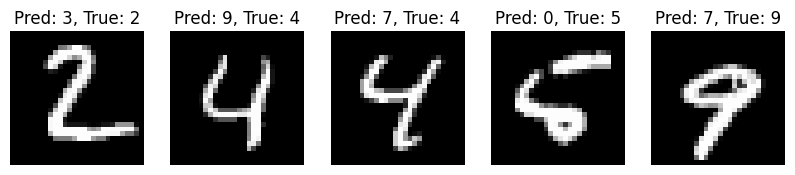

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step


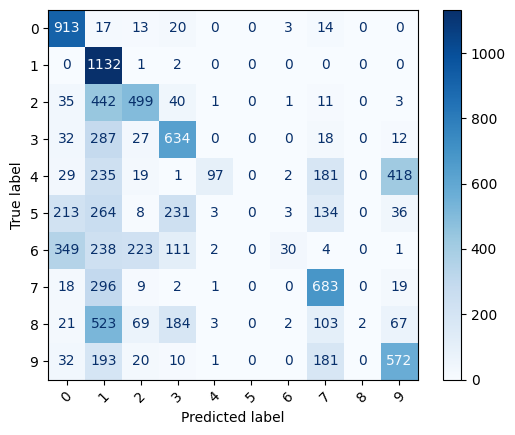

In [20]:
print("model_2a")
visualize_misclassified(model_2a, x_test, y_test)
confusion_matrix_generator(model_2a)

model_2b
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


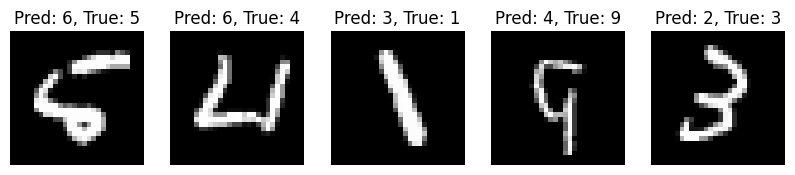

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


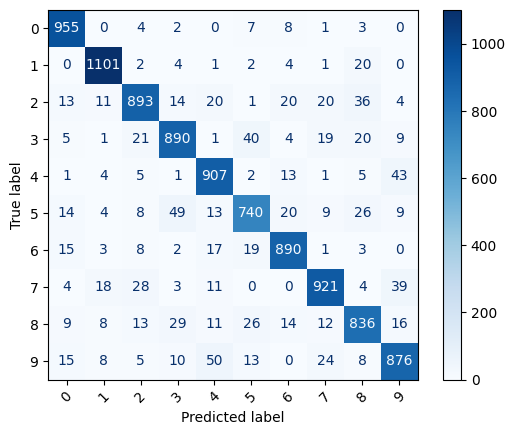

In [21]:
print("model_2b")
visualize_misclassified(model_2b, x_test, y_test)
confusion_matrix_generator(model_2b)

model_2c
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


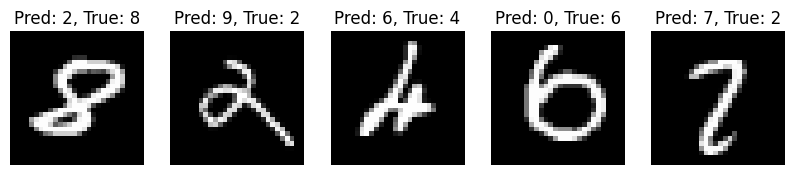

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


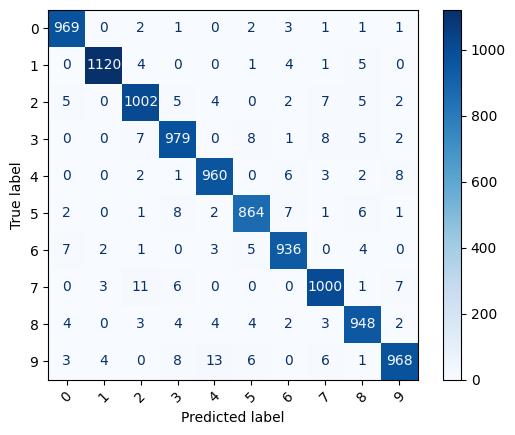

In [22]:
print("model_2c")
visualize_misclassified(model_2c, x_test, y_test)
confusion_matrix_generator(model_2c)

model_2d


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


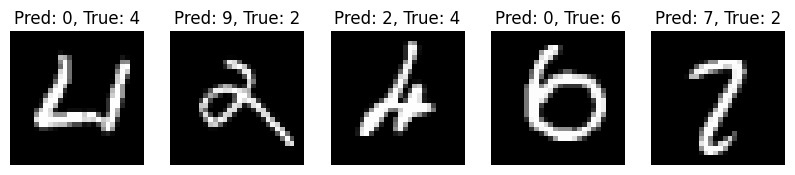

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


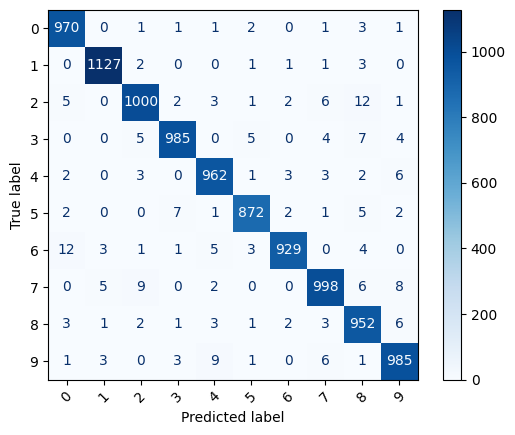

In [23]:
print("model_2d")
visualize_misclassified(model_2d, x_test, y_test)
confusion_matrix_generator(model_2d)

model_2e_1
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


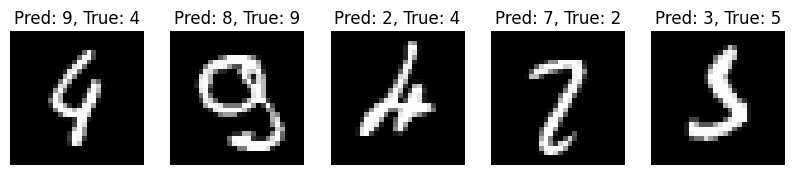

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


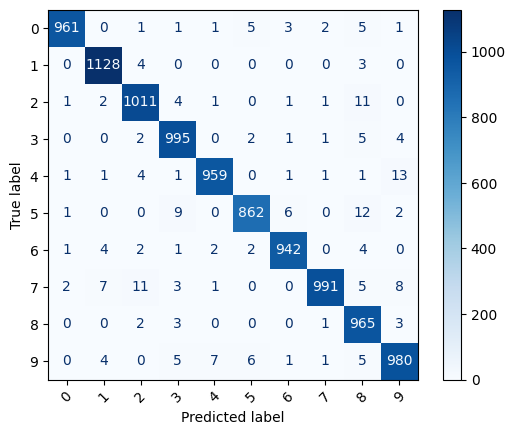

In [24]:
print("model_2e_1")
visualize_misclassified(model_2e_1, x_test, y_test)
confusion_matrix_generator(model_2e_1)

model_2e_2
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


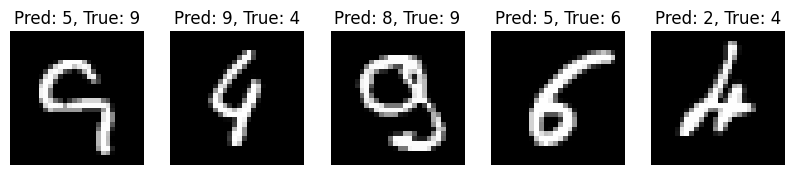

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


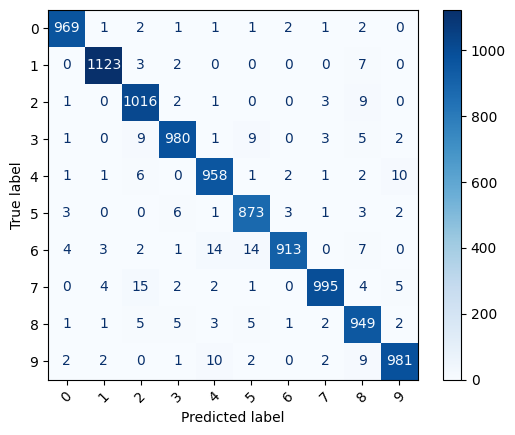

In [25]:
print("model_2e_2")
visualize_misclassified(model_2e_2, x_test, y_test)
confusion_matrix_generator(model_2e_2)